# Sleep, Screen Time, and Weather Analysis

## Project Overview
This notebook explores the relationship between daily **screen time**, **sleep patterns**, and **weather conditions** to uncover patterns influencing mental well-being.

### Key Research Questions
- How does daily screen time impact mood and mental well-being?
- Are specific app categories (e.g., social media, entertainment) associated with changes in mood?
- What is the relationship between sleep patterns and screen time usage?
- Do weather conditions (e.g., temperature, sunny or rainy days) influence mood or screen time habits?
- How do these factors collectively interact to shape daily well-being?

### Techniques Used
1. Exploratory Data Analysis (EDA)
2. Visualizations (e.g., bar charts, scatter plots, heatmaps)
3. Machine Learning Models (to predict sleep quality or screen time habits)

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Set up visualizations
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## Step 1: Load the Data
We will load the provided datasets: **sleep patterns**, **screen time**, and **weather data**.

In [2]:
# Load datasets
sleep_data = pd.read_csv('sleep.csv')
screen_time_data = pd.read_csv('screen_time.csv')
weather_data = pd.read_csv('weather.csv')

# Convert 'date' columns to datetime
sleep_data['date'] = pd.to_datetime(sleep_data['date'])
screen_time_data['date'] = pd.to_datetime(screen_time_data['date'])
weather_data['date'] = pd.to_datetime(weather_data['date'])

# Merge datasets on 'date'
merged_data = pd.merge(sleep_data, screen_time_data, on='date', how='inner')
merged_data = pd.merge(merged_data, weather_data, on='date', how='inner')

# Display the first few rows
merged_data.head()

,date,REM_sleep_minutes,subjective_quality_rating,total_sleep_duration_minutes,daily_screen_time_minutes,social_media_minutes,entertainment_minutes,productivity_minutes,condition,temperature,humidity
0,2024-08-01,104,3,387,303,107,116,80,rainy,34,60
1,2024-08-02,104,3,307,231,67,140,24,rainy,29,56
2,2024-08-03,85,3,435,155,39,63,53,rainy,32,56
3,2024-08-04,116,4,343,193,121,40,32,sunny,33,56
4,2024-08-05,95,3,447,168,62,75,31,rainy,32,54


## Step 2: Exploratory Data Analysis (EDA)
We will explore the relationships between sleep, screen time, and weather using correlation matrices and visualizations.

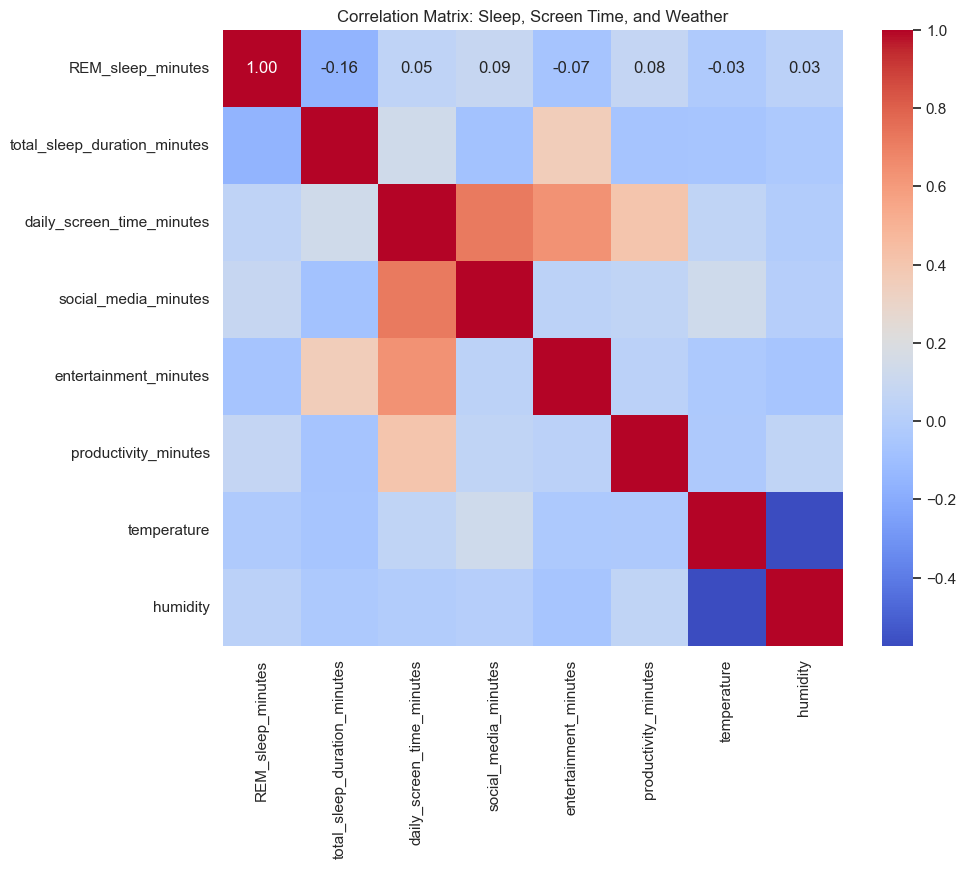

In [3]:
# Correlation matrix
correlation_matrix = merged_data[[
    'REM_sleep_minutes',
    'total_sleep_duration_minutes',
    'daily_screen_time_minutes',
    'social_media_minutes',
    'entertainment_minutes',
    'productivity_minutes',
    'temperature',
    'humidity'
]].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix: Sleep, Screen Time, and Weather')
plt.show()

### Screen Time vs. Sleep Quality
We will examine how daily screen time correlates with subjective sleep quality.

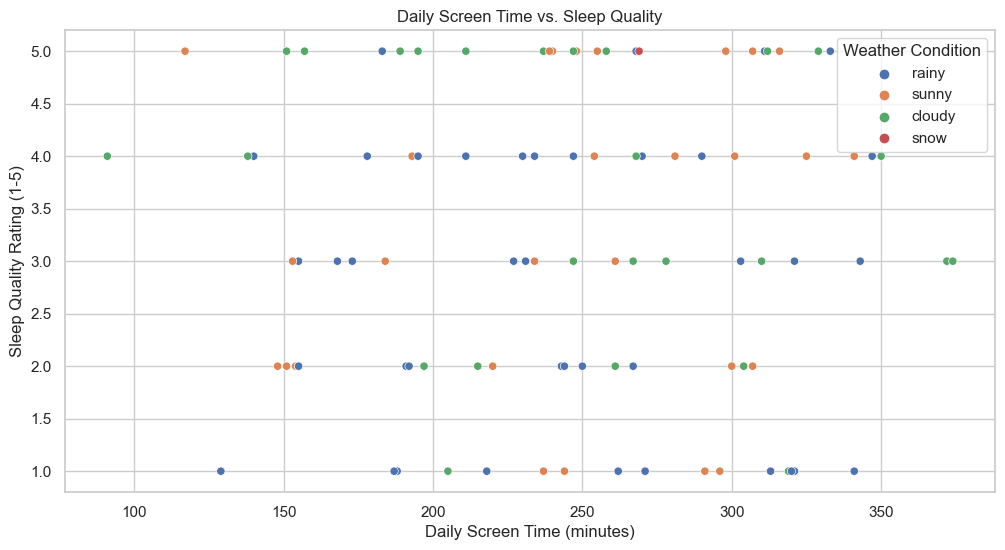

In [4]:
sns.scatterplot(data=merged_data, x='daily_screen_time_minutes', y='subjective_quality_rating', hue='condition')
plt.title('Daily Screen Time vs. Sleep Quality')
plt.xlabel('Daily Screen Time (minutes)')
plt.ylabel('Sleep Quality Rating (1-5)')
plt.legend(title='Weather Condition')
plt.show()

## Step 3: Machine Learning Model
We will build a Random Forest Classifier to predict **sleep quality** based on screen time, weather, and sleep data.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Prepare features and target
features = merged_data[['daily_screen_time_minutes', 'social_media_minutes', 'entertainment_minutes', 'productivity_minutes', 'temperature', 'humidity']]
target = merged_data['subjective_quality_rating']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Train Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.13333333333333333

Classification Report:
               precision    recall  f1-score   support

           1       0.50      0.12      0.20         8
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         7
           4       0.10      0.25      0.14         4
           5       0.40      0.22      0.29         9

    accuracy                           0.13        30
   macro avg       0.20      0.12      0.13        30
weighted avg       0.27      0.13      0.16        30



c:\Users\osman\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\osman\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


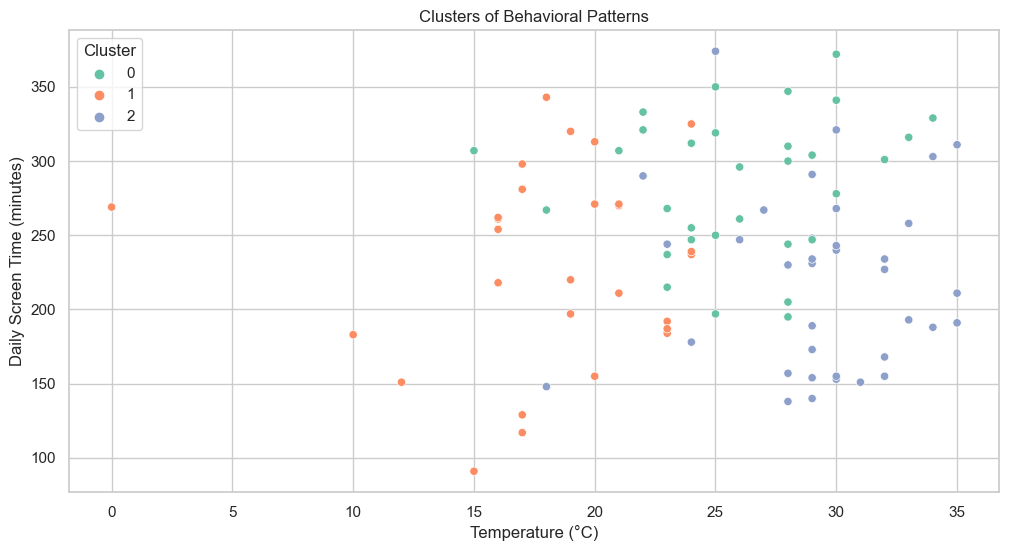

In [9]:
# 3. Clustering: Behavioral Patterns
# ---------------------------------------------
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

clustering_features = merged_data[['REM_sleep_minutes', 'total_sleep_duration_minutes', 'daily_screen_time_minutes', 'temperature', 'humidity']]
scaler = StandardScaler()
clustering_features_scaled = scaler.fit_transform(clustering_features)

# KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(clustering_features_scaled)
merged_data['cluster'] = kmeans.labels_

# Visualize Clusters
sns.scatterplot(data=merged_data, x='temperature', y='daily_screen_time_minutes', hue='cluster', palette='Set2')
plt.title('Clusters of Behavioral Patterns')
plt.xlabel('Temperature (°C)')
plt.ylabel('Daily Screen Time (minutes)')
plt.legend(title='Cluster')
plt.show()

# Save merged data with clusters for future analysis
merged_data.to_csv('merged_data_with_clusters.csv', index=False)


## Step 4: Conclusion
- **Correlation Matrix**: Provided insights into relationships between screen time, sleep, and weather.
- **Visualizations**: Highlighted potential influences of screen time on sleep quality and weather conditions on screen time.
- **Random Forest Model**: Predicted sleep quality with reasonable accuracy based on screen time and weather features.

### Future Directions
1. Include more granular mood data for deeper insights.
2. Explore time-series models for sequential patterns in sleep and screen time.
3. Conduct surveys to validate and enrich the subjective quality ratings.